### Indian Premier League 2020
###### History

- The Indian Premier League (IPL) is seen as the glitzy high of the cricketing season, with its daily share of short bursts of thrills stretched across the summer. Since its launch in 2008, the IPL became a seasonal fix as inevitable as soaring temperatures and the reflexive craving for ice creams. The Twenty20 tournament seemingly brooked no resistance while the purists leant on the classical air that permeated Test cricket.

#### Problem Statement

Runs at top of the order, runs at the death, runs throughout the middle overs. Runs matter
everywhere and they are so important in the construction of a T20 inning. Unlike the rest of
the formats where you have 3-4 specialist batsmen to accumulate the bulk of runs, T20
cricket demands different specialist batsmen at each and every phase of the innings.
With the advent of franchise cricket and mainly IPL, teams have packed themselves with
suitable batting options to meet these demands. And hence the leading run-scorer of a team
always need not be an opener or a number three batsman. A batsman who bats lower down
the order can also end up as the leading scorer within a team, much like Rishabh Pant or
Andre Russell in the previous seasons.

#### Objective

The objective of the problem statement is to predict Total runs of a player in IPL 2020. The
output file should contain only Player Name and the respective IPL 2020 for the test data.

#### <span style="color: blue;"> **Importing DataSet** </span>


1. Since data is in form of excel file we have to use pandas read_excel to load the data
2. After loading it is important to check the complete information of data as it can indication many of the hidden infomation such as null values in a column or a row
3. Check whether any null values are there or not. if it is present then following can be done,
    1. Imputing data using Imputation method in sklearn
    2. Filling NaN values with mean, median and mode using fillna() method
4. Describe data --> which can give statistical analysis

In [190]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing 


In [191]:
# load the data
df = pd.read_excel('Data.xlsx')

In [192]:
df.head()  # Head of the data


,PLAYER,Mat,Inns,NO,2018_Runs,HS,Avg,BF,SR,100,50,4s,6s,2019_Runs
0,Aaron Finch,10,9,1,134,46,16.75,100,134.00,0,0,6,8,160
1,AB de Villiers,12,11,2,480,90*,53.33,275,174.54,0,6,39,30,424
2,Abhishek Sharma,3,3,2,63,46*,63,33,190.90,0,0,3,5,63
3,Ajinkya Rahane,15,14,1,370,65*,28.46,313,118.21,0,1,39,5,396
4,Alex Hales,6,6,0,148,45,24.66,118,125.42,0,0,13,6,165


In [193]:
df.info()  # Information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
PLAYER       100 non-null object
Mat          100 non-null int64
Inns         100 non-null int64
NO           100 non-null int64
2018_Runs    100 non-null int64
HS           100 non-null object
Avg          100 non-null object
BF           100 non-null int64
SR           100 non-null float64
100          100 non-null int64
50           100 non-null int64
4s           100 non-null int64
6s           100 non-null int64
2019_Runs    100 non-null int64
dtypes: float64(1), int64(10), object(3)
memory usage: 11.1+ KB


- Note:- <span style="color: blue;"> Coloumns of Avg and HS are in object form and in Coloumn HS  has special character and we need to remove it</span>

In [194]:
df.describe(include='all')

,PLAYER,Mat,Inns,NO,2018_Runs,HS,Avg,BF,SR,100,50,4s,6s,2019_Runs
count,100,100.000000,100.000000,100.000000,100.000000,100.0,100,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0000
unique,100,NaN,NaN,NaN,NaN,76.0,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Yusuf Pathan,NaN,NaN,NaN,NaN,35.0,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,5.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,10.420000,8.600000,1.790000,189.260000,NaN,NaN,135.890000,133.162000,0.050000,1.010000,16.390000,8.680000,184.2600
std,NaN,4.472542,4.572646,1.683521,182.454235,NaN,NaN,123.063414,33.044126,0.261116,1.642215,17.852875,9.382856,173.3093
min,NaN,1.000000,1.000000,0.000000,13.000000,NaN,NaN,5.000000,71.420000,0.000000,0.000000,0.000000,0.000000,9.0000
25%,NaN,6.000000,4.000000,1.000000,50.000000,NaN,NaN,38.750000,115.860000,0.000000,0.000000,3.000000,1.000000,36.2500
50%,NaN,11.000000,8.000000,1.000000,120.000000,NaN,NaN,88.000000,132.790000,0.000000,0.000000,8.000000,5.000000,108.0000
75%,NaN,14.000000,13.000000,3.000000,284.500000,NaN,NaN,197.750000,149.525000,0.000000,1.000000,23.250000,11.250000,334.5000


### Data Pre-processing

In [195]:
df.replace('\*','',regex=True,inplace=True) # Removing the * special character

In [196]:
import re


In [197]:
df.loc[df['Avg']=='-']

,PLAYER,Mat,Inns,NO,2018_Runs,HS,Avg,BF,SR,100,50,4s,6s,2019_Runs
44,Kedar Jadhav,1,1,1,24,24,-,22,109.09,0,0,1,2,15
57,Mitchell Johnson,6,2,2,16,12,-,11,145.45,0,0,2,0,11
81,Shardul Thakur,13,1,1,15,15,-,5,300.00,0,0,3,0,10


In [198]:
df.replace('\-','NAN',regex=True,inplace=True) # Replace the - with NAN

In [199]:
df['Avg']=df['Avg'].astype(float)  # Converting object type into float type
df['HS']=df['HS'].astype(float)
df['PLAYER']=df['PLAYER'].astype(str)

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
PLAYER       100 non-null object
Mat          100 non-null int64
Inns         100 non-null int64
NO           100 non-null int64
2018_Runs    100 non-null int64
HS           100 non-null float64
Avg          97 non-null float64
BF           100 non-null int64
SR           100 non-null float64
100          100 non-null int64
50           100 non-null int64
4s           100 non-null int64
6s           100 non-null int64
2019_Runs    100 non-null int64
dtypes: float64(3), int64(10), object(1)
memory usage: 11.1+ KB


In [201]:
df.isnull().sum() # Checking the sum of the null values

PLAYER       0
Mat          0
Inns         0
NO           0
2018_Runs    0
HS           0
Avg          3
BF           0
SR           0
100          0
50           0
4s           0
6s           0
2019_Runs    0
dtype: int64

Note:- <span style="color: blue;" > These NaN value of Avg coloumn is filled by the 2018_runs divide by (Inns-NO) if NO>1 else fillby 2018_runs</span>

In [202]:
#Filling the NAN VAlues by dervied function

for i in df['NO']:
    if i>1:
        df['Avg']=df['Avg'].transform(lambda x : x.fillna(df['2018_Runs']/(df['Inns']-df['NO']) ))
    else:
        df['Avg']=df['Avg'].transform(lambda x : x.fillna(df['2018_Runs']))

In [203]:
df.iloc[44]  # Checking the location of NAN value

PLAYER       Kedar Jadhav
Mat                     1
Inns                    1
NO                      1
2018_Runs              24
HS                     24
Avg                    24
BF                     22
SR                 109.09
100                     0
50                      0
4s                      1
6s                      2
2019_Runs              15
Name: 44, dtype: object

In [204]:
df.info() #info of the class

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
PLAYER       100 non-null object
Mat          100 non-null int64
Inns         100 non-null int64
NO           100 non-null int64
2018_Runs    100 non-null int64
HS           100 non-null float64
Avg          100 non-null float64
BF           100 non-null int64
SR           100 non-null float64
100          100 non-null int64
50           100 non-null int64
4s           100 non-null int64
6s           100 non-null int64
2019_Runs    100 non-null int64
dtypes: float64(3), int64(10), object(1)
memory usage: 11.1+ KB


In [205]:
df.isnull().sum()

PLAYER       0
Mat          0
Inns         0
NO           0
2018_Runs    0
HS           0
Avg          0
BF           0
SR           0
100          0
50           0
4s           0
6s           0
2019_Runs    0
dtype: int64

In [206]:
df.drop('PLAYER' , axis=1, inplace=True)  # Drop of the coloums

- Note <span style="color: red;"> **Data with zero NAN values**</span>

 ### <span style="color: blue;"> **EDA**</span>

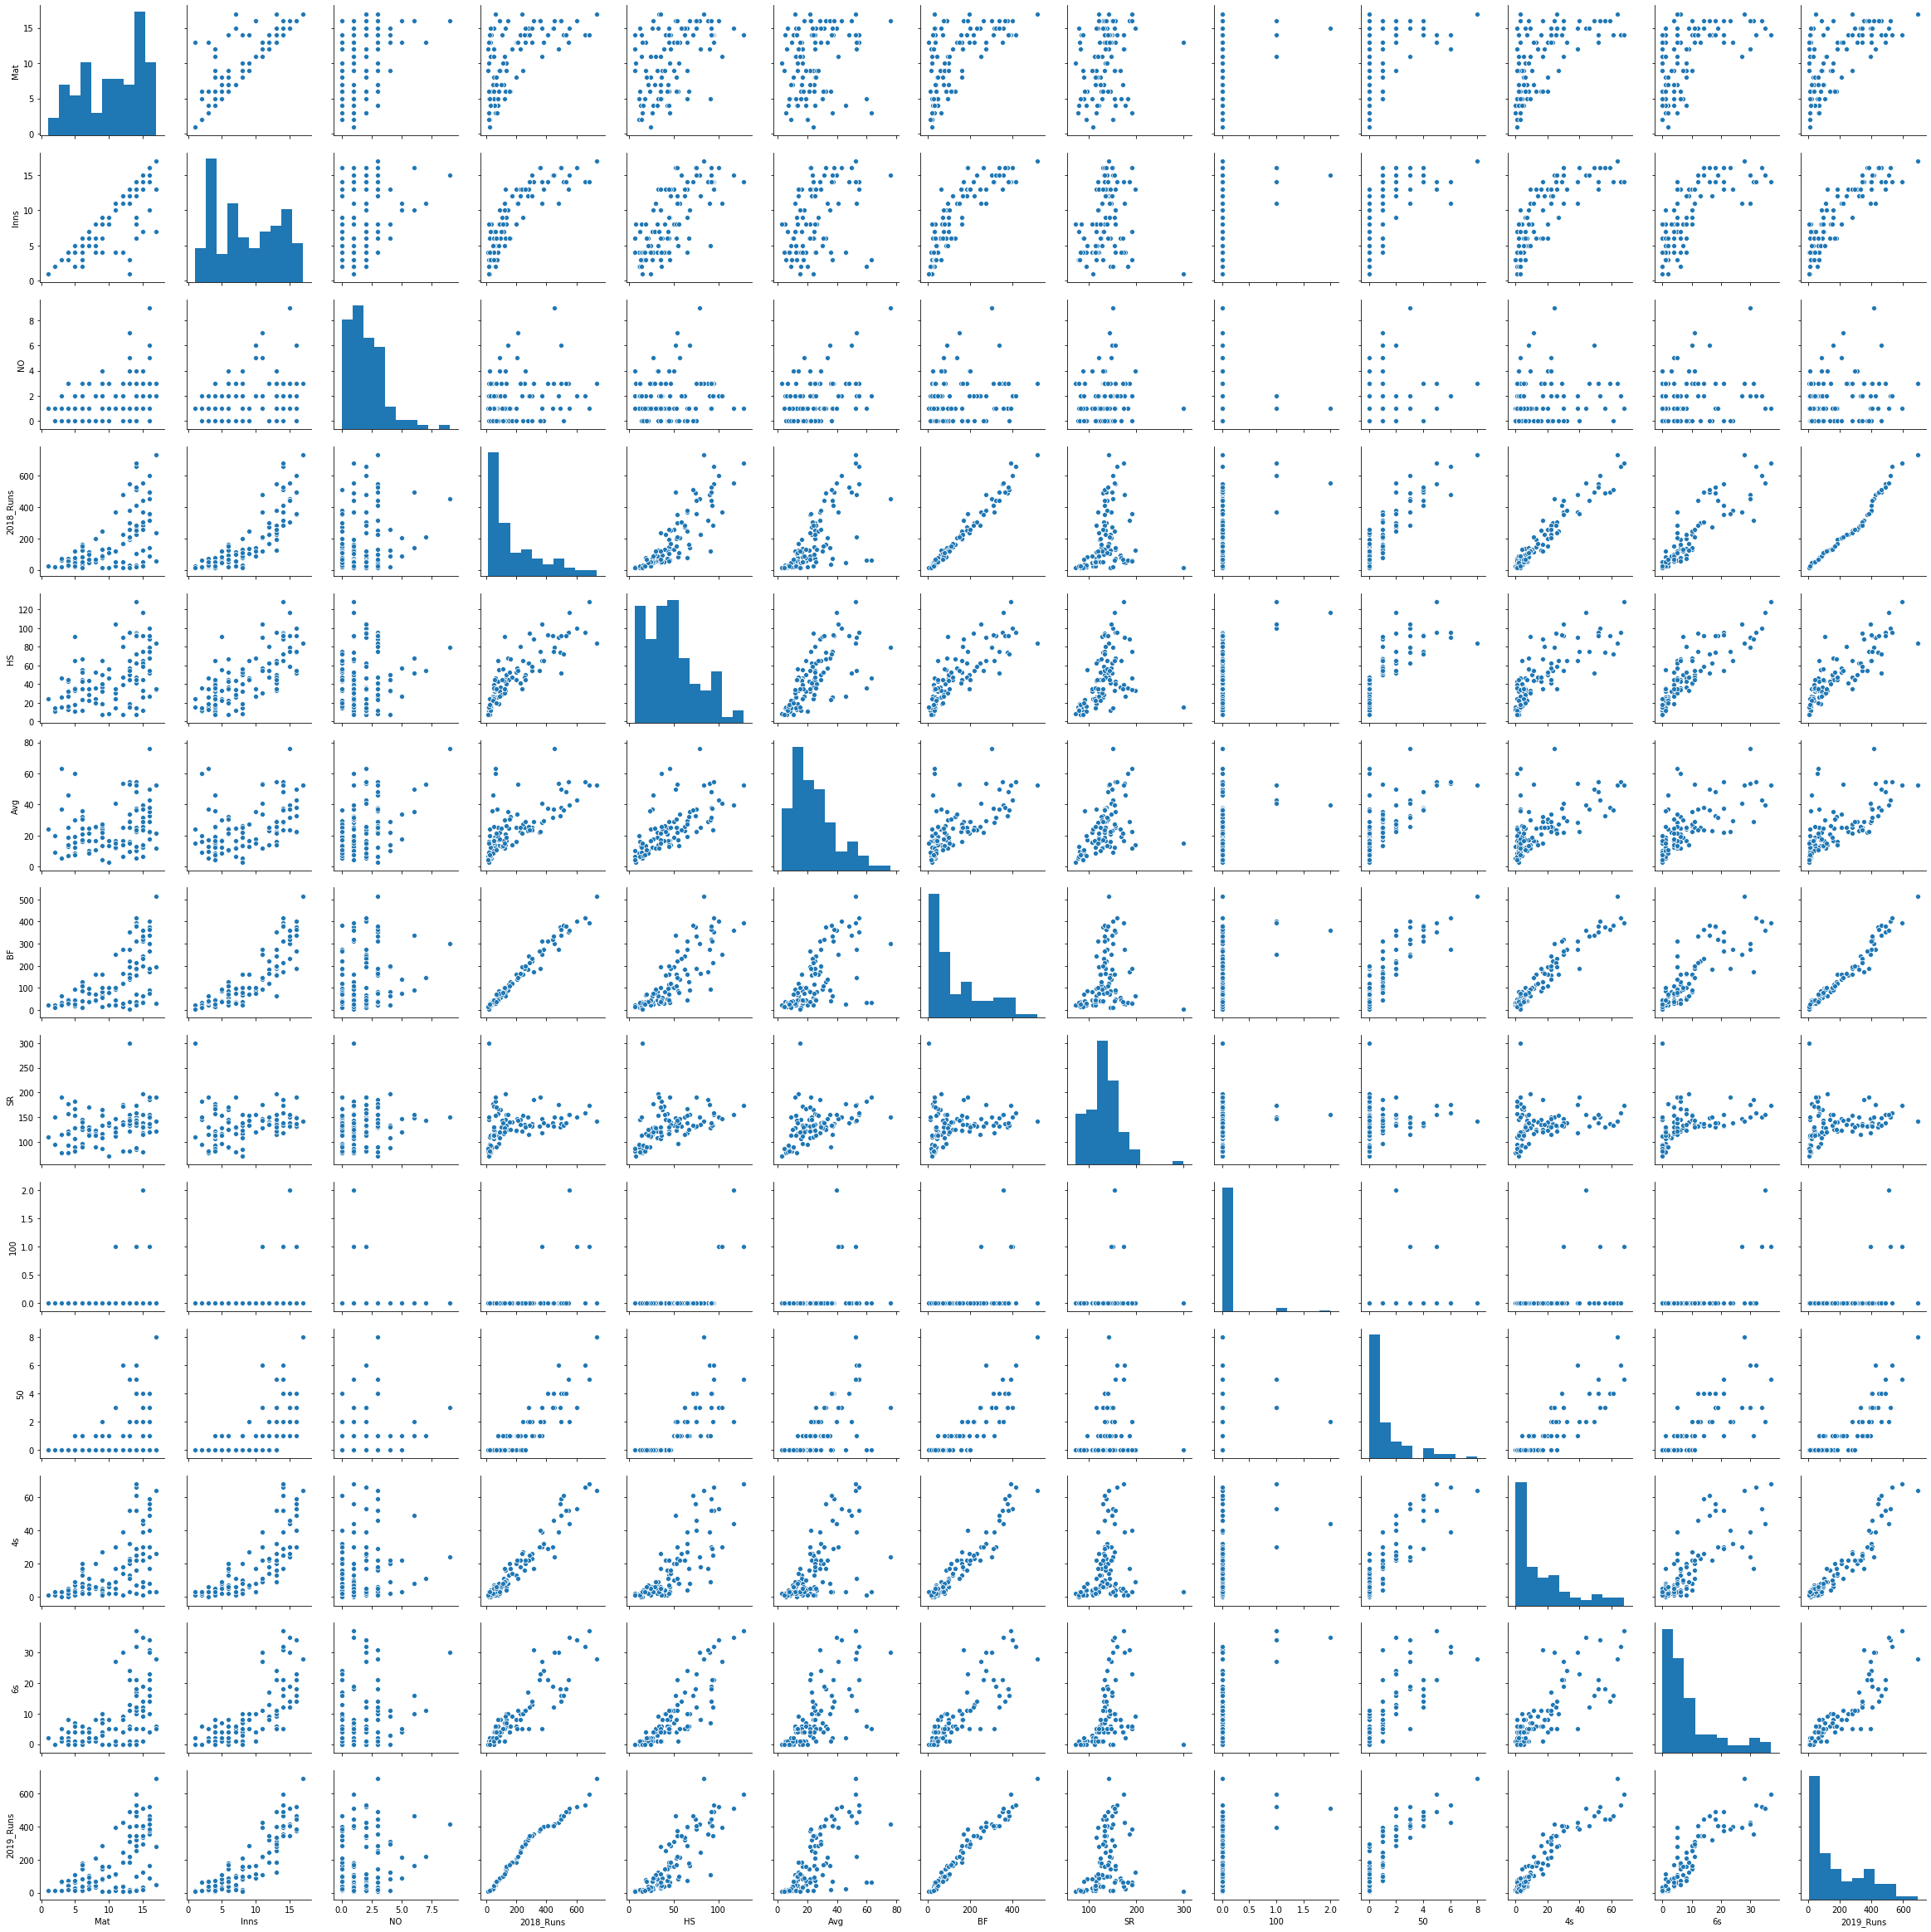

In [207]:
sns.pairplot(df)  #pairplot of the data

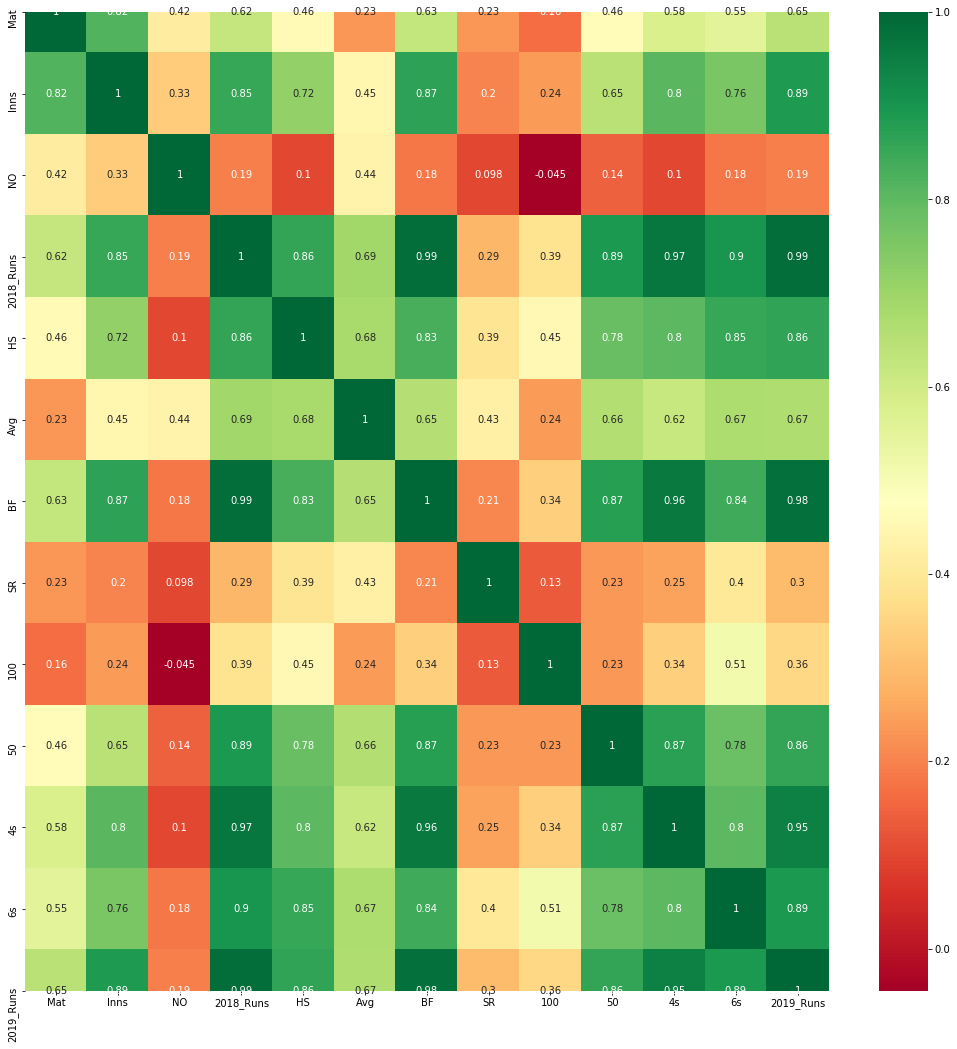

In [208]:
# Finds correlation between Independent and dependent attributes using heatmaps

plt.figure(figsize = (18,18))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [209]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)


In [210]:
X= df.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,Mat,29.845376
1,Inns,67.828176
2,NO,6.922449
3,2018_Runs,707.494296
4,HS,24.423157
5,Avg,23.090101
6,BF,284.310387
7,SR,22.518204
8,100,2.142923
9,50,13.013317


In [211]:
# Dropping the Coloumns  '6s','4s','BF',50,100 because these are highly corelated to each other

In [212]:
col=['6s','4s','BF',50,100]
df.drop(col , axis=1, inplace=True)  # Drop of the coloums

In [213]:
X= df.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,Mat,27.405308
1,Inns,36.033313
2,NO,5.333476
3,2018_Runs,18.985772
4,HS,18.519512
5,Avg,19.482866
6,SR,18.853691


In [214]:
#Still the VIF is very high and highly correlated coloumns are there 
# Drop the coloumn 2018_Runs and HS because it is highly dependent on Average score , innings and Not out


In [215]:
df.drop('HS' , axis=1, inplace=True)  # Drop of the coloums
df.drop('2018_Runs', axis=1, inplace=True)  # Drop of the coloums

In [216]:
X= df.iloc[:,:-1] #Check VIF Score
calc_vif(X)

,variables,VIF
0,Mat,26.803856
1,Inns,19.589561
2,NO,3.405454
3,Avg,8.338622
4,SR,10.501139


In [217]:
#Still the VIF is High try to remove the outliers

### Various ways of finding the outlier.
 - Using scatter plots
- Box plot
- using z score
- using the IQR interquantile rang

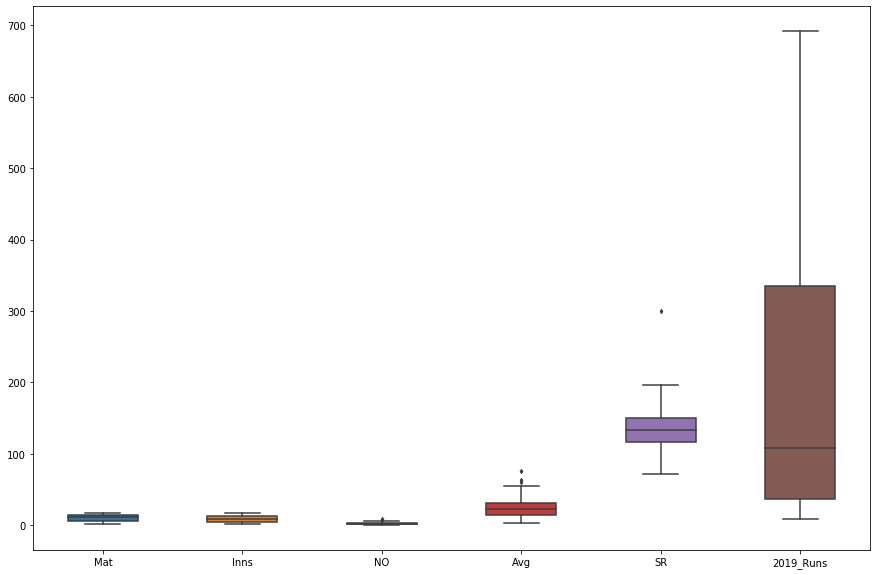

In [218]:
# Check for outliers
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)

In [219]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Mat            8.0000
Inns           9.0000
NO             2.0000
Avg           17.7875
SR            33.6650
2019_Runs    298.2500
dtype: float64


In [220]:
#Removing the ouliers using inter-quantile Rane
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out.shape

(95, 6)

In [221]:
a=df_out.iloc[:,:-1]
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()

X_scaled = scaler.fit_transform(a)

from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = a.columns

In [222]:
vif

,VIF,Features
0,4.407642,Mat
1,5.097752,Inns
2,1.398847,NO
3,2.077852,Avg
4,1.395832,SR


- NOW its looks  good VIF Score

In [223]:
#After Removing the outliers the defaut index will not be in sequence for that need to reset the defautl index
df_out.reset_index(inplace=True)
df_out.drop('index', inplace=True, axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [224]:
# Remove the regex 
import re

regex = re.compile(r"\[|\]|<", re.IGNORECASE)


df.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in df.columns.values]

In [225]:
# Divide the data into dependent and independent variable
X=df_out.iloc[:,:-1] # Independent variables
y=df_out.iloc[:,-1]

In [226]:
X.head()

,Mat,Inns,NO,Avg,SR
0,10,9,1,16.75,134.00
1,12,11,2,53.33,174.54
2,15,14,1,28.46,118.21
3,6,6,0,24.66,125.42
4,16,16,2,43.00,149.75


## Fitting model using XGBoost

1. Split dataset into train and test set in order to prediction w.r.t X_test
2. If needed do scaling of data
    * Scaling is not done in XG Boost
3. Import model
4. Fit the data
5. Predict w.r.t test
6. In regression check **RSME** Score
7. Plot graph

In [227]:
#Slicing the Data for using the test and train data for further process
df1=X.iloc[0:23]
df2=X.iloc[23:46]
df3=X.iloc[46:95]
#df4=X.iloc[69:95]

dfy1=y.iloc[0:23]
dfy2=y.iloc[23:46]
dfy3=y.iloc[46:95]
#dfy4=y.iloc[69:95]

In [228]:
#Solitting the data for train and test
X_train=pd.concat([df1,df3])
X_test=df2
y_train=pd.concat([dfy1,dfy3])
y_test=dfy2

In [229]:
X_train.shape

(72, 5)

In [82]:
# Split the data into test data and train data

#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [231]:
# import xgboost regressor
import xgboost as xgb
regressor_xgb=xgb.XGBRegressor()
regressor_xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [232]:
regressor_xgb.score(X_train, y_train) # score of train data

0.9999999999413764

In [233]:
regressor_xgb.score(X_test, y_test) # Score of test data

0.944416700161791

In [234]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor_xgb,X,y,cv=5)  # cross validation

In [235]:
prediction_xgb=regressor_xgb.predict(X_test)  # predication done using xgboost regressor

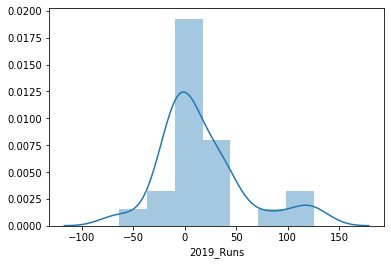

In [236]:
sns.distplot(y_test-prediction_xgb)  # Plot of the predication

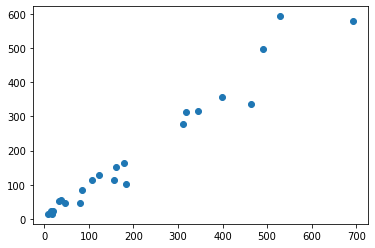

In [237]:
plt.scatter(y_test,prediction_xgb) # Scatter Plot

In [238]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction_xgb))
print('MSE:', metrics.mean_squared_error(y_test, prediction_xgb))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_xgb)))

MAE: 29.592904505522355
MSE: 2052.9123353556056
RMSE: 45.30907564004816


In [239]:
metrics.r2_score(y_test, prediction_xgb) # Score

0.944416700161791

## Hyperparameter Tuning


* Choose following method for hyperparameter tuning
    1. **RandomizedSearchCV** --> Fast
    2. **GridSearchCV**
* Assign hyperparameters in form of dictionery
* Fit the model
* Check best paramters and best score

In [240]:
xgb.XGBRegressor()

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             objective='reg:squarederror', random_state=None, reg_alpha=None,
             reg_lambda=None, scale_pos_weight=None, subsample=None,
             tree_method=None, validate_parameters=None, verbosity=None)

In [241]:
from sklearn.model_selection import RandomizedSearchCV
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Various learning rate parameters
learning_rate = ['0.05','0.1', '0.2','0.3','0.5','0.6']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
#Subssample parameter values
subsample=[0.7,0.6,0.8,0.9,1.0]
# Minimum child weight parameters
min_child_weight=[1,2,3,4,5,6,7]

In [242]:
# Create the random grid
random_grid_xgb = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'min_child_weight': min_child_weight}

In [243]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
xg_random = RandomizedSearchCV(estimator = regressor_xgb, param_distributions = random_grid_xgb,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [244]:
xg_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   30.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   36.8s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   45.9s
[Parallel(n_jobs=-1)]: Done 493 out of 500 | elapsed:   51.6s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   51.7s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n...
                   param_distributions={'learning_rate': ['0.05', '0.1', '0.2',
                                                          '0.3', '0.5', '0.6'],
                              

In [245]:
xg_random.best_params_

{'subsample': 0.7,
 'n_estimators': 500,
 'min_child_weight': 1,
 'max_depth': 15,
 'learning_rate': '0.05'}

In [246]:
predictions_xgb1=xg_random.predict(X_test)

In [247]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions_xgb1))
print('MSE:', metrics.mean_squared_error(y_test, predictions_xgb1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_xgb1)))

MAE: 28.38444941976796
MSE: 1628.0461869026026
RMSE: 40.349054349545824


In [248]:
metrics.r2_score(y_test,predictions_xgb1 )

0.9559200956618612

In [250]:
import pickle
# open a file, where you ant to store the data
file = open('ipl_2020_xgb_final.pkl', 'wb')

# dump information to that file
pickle.dump(xg_random, file)

In [254]:
model = open('ipl_2020_xgb_final.pkl','rb')
xgb = pickle.load(model)

In [255]:
xgb

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n...
                   param_distributions={'learning_rate': ['0.05', '0.1', '0.2',
                                                          '0.3', '0.5', '0.6'],
                              

In [256]:
xgb.best_params_

{'subsample': 0.7,
 'n_estimators': 500,
 'min_child_weight': 1,
 'max_depth': 15,
 'learning_rate': '0.05'}

### Test_Data

In [257]:
# load the data
test = pd.read_excel('Data.xlsx',sheet_name='Test_Data')

In [258]:
# load the data
test = pd.read_excel('Data.xlsx',sheet_name='Test_Data')
test.replace('\*','',regex=True,inplace=True) # Removing the * special character
test.loc[df['Avg']=='-']
test.replace('\-','NAN',regex=True,inplace=True) # Replace the - with NAN
test['Avg']=test['Avg'].astype(float)  # Converting object type into float type
test['HS']=test['HS'].astype(float)
test['PLAYER']=test['PLAYER'].astype(str)

test.isnull().sum() # Checking the sum of the null values

for i in test['NO']:
    if i>1:
        test['Avg']=test['Avg'].transform(lambda x : x.fillna(test['2019_Runs']/(test['Inns']-test['NO']) ))
    else:
        test['Avg']=test['Avg'].transform(lambda x : x.fillna(test['2019_Runs']))
        
        
#test.drop('PLAYER' , axis=1, inplace=True)  # Drop of the coloums

col1=['6s','4s','BF',50,100, 'HS','2019_Runs']
test.drop(col1 , axis=1, inplace=True)  # Drop of the coloums


Q1 = test.quantile(0.25)
Q3 = test.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

test_out = test[~((test < (Q1 - 1.5 * IQR)) |(test > (Q3 + 1.5 * IQR))).any(axis=1)]
test_out.shape

Mat      7.0000
Inns     8.2500
NO       3.0000
Avg     18.6050
SR      36.9675
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


(92, 6)

In [259]:
test_out.head()

,PLAYER,Mat,Inns,NO,Avg,SR
1,KL Rahul,14,14,3,53.90,135.38
2,Quinton de Kock,16,16,1,35.26,132.91
3,Shikhar Dhawan,16,16,1,34.73,135.67
5,Chris Gayle,13,13,1,40.83,153.60
6,Rishabh Pant,16,16,3,37.53,162.66


In [260]:
test_data=test_out.iloc[:,1:]

In [261]:
test_data.head()

,Mat,Inns,NO,Avg,SR
1,14,14,3,53.90,135.38
2,16,16,1,35.26,132.91
3,16,16,1,34.73,135.67
5,13,13,1,40.83,153.60
6,16,16,3,37.53,162.66


In [262]:
# Remove the regex 
import re

regex = re.compile(r"\[|\]|<", re.IGNORECASE)


test_out.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in test_out.columns.values]

In [263]:
prediction_xgb = xgb.predict(test_data)

In [264]:
prediction_xgb

array([529.37115 , 448.0673  , 443.93442 , 439.57516 , 428.08334 ,
       448.57623 , 427.1308  , 297.5047  , 409.41006 , 412.7278  ,
       374.051   , 387.05975 , 397.39975 , 379.6698  , 375.42947 ,
       371.61444 , 371.29205 , 396.42996 , 379.58362 , 385.1483  ,
       357.4744  , 361.48813 , 327.57074 , 253.61542 , 242.78465 ,
       313.30927 , 274.36124 , 340.0708  , 313.87125 , 232.60434 ,
       317.2705  , 231.21815 , 227.64574 , 243.30875 , 199.75034 ,
       236.35126 , 126.17446 , 194.6148  , 187.75177 , 133.62923 ,
       166.8343  , 145.0874  , 134.70468 , 122.19967 , 114.1562  ,
       156.0812  , 150.03235 ,  98.81842 ,  83.8236  , 101.41162 ,
        84.27826 ,  65.67898 ,  73.105545,  75.69549 , 109.63407 ,
        95.16341 ,  82.61784 ,  65.12516 ,  59.595207,  77.71844 ,
        33.697517,  56.377743,  80.67729 ,  34.30874 ,  18.219055,
        23.473099,  22.411348,  42.51207 ,  40.35716 ,  58.958477,
        23.073833,  35.873684,  34.396336,  64.07094 ,  38.652

In [265]:
import numpy as np
prediction_xgb_final=np.array(prediction_xgb)
prediction_xgb_final.astype(int)

array([529, 448, 443, 439, 428, 448, 427, 297, 409, 412, 374, 387, 397,
       379, 375, 371, 371, 396, 379, 385, 357, 361, 327, 253, 242, 313,
       274, 340, 313, 232, 317, 231, 227, 243, 199, 236, 126, 194, 187,
       133, 166, 145, 134, 122, 114, 156, 150,  98,  83, 101,  84,  65,
        73,  75, 109,  95,  82,  65,  59,  77,  33,  56,  80,  34,  18,
        23,  22,  42,  40,  58,  23,  35,  34,  64,  38,  54,  11,  13,
        21,  15,  12,  10,  11,  32,  11,   8,  30,  10,  10,   9,  13,
        13])

In [266]:
my_submission = pd.DataFrame({'PLAYER': test_out.PLAYER, '2020_Runs': prediction_xgb_final.astype(int)})
# you could use any filename. We choose submission here
my_submission.to_csv('submission_ipl2020.csv', index=False)

In [267]:
a= pd.read_csv('submission_ipl2020.csv')

In [268]:
a.head()

,PLAYER,2020_Runs
0,KL Rahul,529
1,Quinton de Kock,448
2,Shikhar Dhawan,443
3,Chris Gayle,439
4,Rishabh Pant,428


In [117]:
a.shape

(92, 2)